In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()

In [3]:
X = pd.DataFrame(boston.data)
X.columns = [str.lower(_) for _ in boston.feature_names]
X.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [4]:
y = pd.DataFrame(boston.target)
y.columns = ['TARGET']
y.head(10)

,TARGET
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)

# Базовый тест

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred_train = lr.predict(x_train)

In [9]:
print("MSE %.3f" % mean_squared_error(y_pred_train, y_train))
print("MAE %.3f" % mean_absolute_error(y_pred_train, y_train))
print("R2 Score %.3f" % r2_score(y_pred_train, y_train))

MSE 22.545
MAE 3.357
R2 Score 0.655


In [10]:
y_pred_test = lr.predict(x_test)

In [11]:
print("MSE %.3f" % mean_squared_error(y_pred_test, y_test))
print("MAE %.3f" % mean_absolute_error(y_pred_test, y_test))
print("R2 Score %.3f" % r2_score(y_pred_test, y_test))

MSE 21.517
MAE 3.163
R2 Score 0.669


# Расчет калибровочной дельты

In [12]:
y_pred_train[:5]

array([[25.28876411],
       [23.70313309],
       [22.15603301],
       [21.26400891],
       [16.81402917]])

In [13]:
y_train[:5]

,TARGET
5,28.7
116,21.2
45,19.3
16,23.1
468,19.1


In [14]:
y_train_delta = (y_pred_train - y_train)

In [15]:
y_train_delta = y_train_delta.applymap(lambda x: round(x,0))

In [16]:
y_train_delta[:5]

,TARGET
5,-3.0
116,3.0
45,3.0
16,-2.0
468,-2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cc2d62110>]],
      dtype=object)

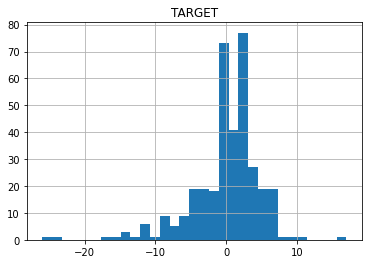

In [17]:
y_train_delta.hist(bins='auto')

# Прогноз нового признака

In [18]:
rfc = RandomForestClassifier()

In [19]:
rfc.fit(x_train,y_train_delta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred_train_delta = rfc.predict(x_train)

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  1.,  6.,  1.,  9.,
         5.,  9., 19., 19., 18., 73., 41., 77., 27., 19., 19.,  1.,  1.,
         1.,  0.,  0.,  0.,  1.]),
 array([-26.        , -24.61290323, -23.22580645, -21.83870968,
        -20.4516129 , -19.06451613, -17.67741935, -16.29032258,
        -14.90322581, -13.51612903, -12.12903226, -10.74193548,
         -9.35483871,  -7.96774194,  -6.58064516,  -5.19354839,
         -3.80645161,  -2.41935484,  -1.03225806,   0.35483871,
          1.74193548,   3.12903226,   4.51612903,   5.90322581,
          7.29032258,   8.67741935,  10.06451613,  11.4516129 ,
         12.83870968,  14.22580645,  15.61290323,  17.        ]),
 <a list of 31 Patch objects>)

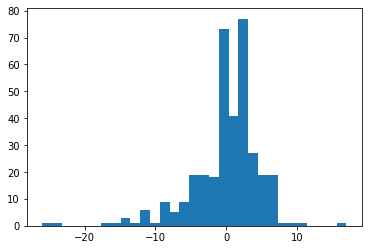

In [21]:
plt.hist(y_pred_train_delta, bins='auto')

In [22]:
y_pred_test_delta = rfc.predict(x_test)

In [23]:
y_pred_test_delta[:5]

array([ 4.,  2., -2.,  1.,  2.])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  2.,  3., 12.,  3.,  7., 12., 23., 25., 31., 13., 13.,
         2.,  3.]),
 array([-24.        , -22.89285714, -21.78571429, -20.67857143,
        -19.57142857, -18.46428571, -17.35714286, -16.25      ,
        -15.14285714, -14.03571429, -12.92857143, -11.82142857,
        -10.71428571,  -9.60714286,  -8.5       ,  -7.39285714,
         -6.28571429,  -5.17857143,  -4.07142857,  -2.96428571,
         -1.85714286,  -0.75      ,   0.35714286,   1.46428571,
          2.57142857,   3.67857143,   4.78571429,   5.89285714,
          7.        ]),
 <a list of 28 Patch objects>)

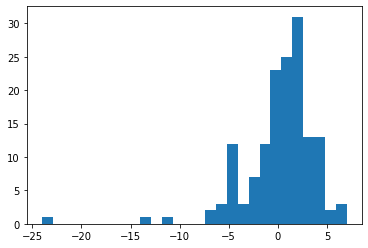

In [24]:
plt.hist(y_pred_test_delta, bins='auto')

# Апгрейд x_train и x_test

In [25]:
x_train = x_train.assign(delta=y_pred_train_delta)

In [26]:
x_train.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,delta
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,-3.0
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04,3.0
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21,3.0
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,-2.0
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13,-2.0
360,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,-2.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,-4.0
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,1.0
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,-5.0
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15,-1.0


In [27]:
x_test = x_test.assign(delta = y_pred_test_delta)

In [28]:
x_test.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,delta
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,4.0
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,2.0
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,-2.0
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,1.0
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,2.0
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97,3.0
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,1.0
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,-1.0
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87,1.0
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,-0.0


# Повторный тест

In [29]:
lr_result = LinearRegression()

In [30]:
lr_result.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred_train_result = lr_result.predict(x_train)

In [32]:
print("MSE %.3f" % mean_squared_error(y_pred_train_result, y_train))
print("MAE %.3f" % mean_absolute_error(y_pred_train_result, y_train))
print("R2 Score %.3f" % r2_score(y_pred_train_result, y_train))

MSE 0.079
MAE 0.244
R2 Score 0.999


In [33]:
y_pred_test_result = lr_result.predict(x_test)

In [34]:
print("MSE %.3f" % mean_squared_error(y_pred_test_result, y_test))
print("MAE %.3f" % mean_absolute_error(y_pred_test_result, y_test))
print("R2 Score %.3f" % r2_score(y_pred_test_result, y_test))

MSE 12.684
MAE 2.515
R2 Score 0.853
